In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Implement a KNN model to classify the animals in to categorie


In [2]:
rawData = pd.read_csv('Zoo.csv')
rawData

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Exploring and Understanding the data -- EDA
-----------------------------------------

### How many unique values are ther in each column?? 
        Most columns have cardinality of 2 and 3 columns have more than 2 cardinality
        
### Which columns have more than to catagories. (cardinality more than 2)?
        Animal names, Legs, Type have greater than 2 categories
        
### What is the maximum cardinality for any column?
        The maximum cardinality is for Animal Names, with a cardinalit of 100, meaning 100 unique values out of 101 values. only one value is being repeted

In [3]:
for a in rawData.columns:
    if rawData[a].nunique() > 2:
        print('\n',f'NO of unique values in "{a}" columns are - {rawData[a].nunique()}',end='\n')
        print('\n',a,end='\n')
        print(rawData[a].value_counts(),end='\n')
        print('--------------------------------------------------------')


 NO of unique values in "animal name" columns are - 100

 animal name
frog        2
chub        1
gorilla     1
wren        1
boar        1
           ..
pitviper    1
haddock     1
gnat        1
aardvark    1
porpoise    1
Name: animal name, Length: 100, dtype: int64
--------------------------------------------------------

 NO of unique values in "legs" columns are - 6

 legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
--------------------------------------------------------

 NO of unique values in "type" columns are - 7

 type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64
--------------------------------------------------------


**Data Dictionary - Data Description**

    Looking at Data.info(), it looks like all the columns from index 1 have numeric value(int value), and we can confirm that there are no null values as all non null value counts are 101, which matches the lenth of Dataframe.
    
    Further, intutionaly, looking at the column names we can infer that the features of various animals has been given and we are to predict the animal name using the features of animals.
    
     0   animal name  --  Names of various animals  (there are total 100 animals, frog has repeted 2)
     1   hair         --  Binary values (looks like no = 0 and yes = 1)
     2   feathers     --  Binary values (looks like no = 0 and yes = 1)
     3   eggs         --  Binary values (looks like no = 0 and yes = 1)
     4   milk         --  Binary values (looks like no = 0 and yes = 1)
     5   airborne     --  Binary values (looks like no = 0 and yes = 1)
     6   aquatic      --  Binary values (looks like no = 0 and yes = 1)
     7   predator     --  Binary values (looks like no = 0 and yes = 1)
     8   toothed      --  Binary values (looks like no = 0 and yes = 1)
     9   backbone     --  Binary values (looks like no = 0 and yes = 1)
     10  breathes     --  Binary values (looks like no = 0 and yes = 1)
     11  venomous     --  Binary values (looks like no = 0 and yes = 1)
     12  fins         --  Binary values (looks like no = 0 and yes = 1)
     13  legs         --  Count of legs values 0,2,4,5,6,8
                             0 - 0 no legs
                             2 - 2 legged animal
                             4 - 4 legged animal
                             5 - 5 legged animal
                             6 - 6 legged animal
                             8 - 8 legged animal
     14  tail         --  Binary values (looks like no = 0 and yes = 1)
     15  domestic     --  Binary values (looks like no = 0 and yes = 1)
     16  catsize      --  Binary values (looks like no = 0 and yes = 1)
     17  type         --  Type has 7 categories probably we need to understand what they mean
                             1 -- Land animal
                             2 -- Birds
                             3 -- Reptile
                             4 -- Fish
                             5 -- Amphibian
                             6 -- Insects
                             7 -- others
                             
                             it was easy to decipher the types of animals by looking at the csv file in excel, as it was a very small file. it would be very difficult to do this analysis in a large dataset.

## **Are there any null/missing values???**
        **looking below there are no null values.**
        
## Are the datatypes of all the columns  alright??
        **All columns are marked appropriately exept that the Animal and Type columns to be marked as Category. Basically Object coulumn is used by pandas to represent mixed values or values other then numbers or floats. However, the correct data type for catagorical or nomial values is category.**
        
        However, do we need the nominal values for prediction. the strong answer will be no. it is just a noise in the total dataset when we encode the nominal data. Hence drop Animal name column. (let us also verify using other methods)

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### Let us change the datatypes for "type" and "animal name"

In [5]:
rawData = rawData.astype({'animal name':'category','type':'category'})
rawData[['animal name','type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   animal name  101 non-null    category
 1   type         101 non-null    category
dtypes: category(2)
memory usage: 6.5 KB


# Outlier Detection
-------------------

### DBSCAN - outliers in multidimentinal space

    **DBSCAN does not perform very well in sparse Datasets. Hence, we shall discard the DBSCAN method of outlier Detection in multidimentional space.**

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [7]:
X = rawData.iloc[:,1:-1]
X
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [8]:
Silhouette_scores = []
for e in  np.linspace(2.5,5,20,False):
#     print(np.round(e,2),'--')
    for i in range(17,23,1):
        db = DBSCAN(eps=e,min_samples=i).fit(X_scaled)
        Silhouette_scores.append([e,i,silhouette_score(X_scaled,db.labels_)]) 
#         print(silhouette_score(X_scaled,db.labels_))

In [9]:
a = pd.DataFrame(Silhouette_scores,columns=['eps','min_samples','silhouette_score'])
a.sort_values(by='silhouette_score')

,eps,min_samples,silhouette_score
17,2.750,22,0.128544
5,2.500,22,0.128544
11,2.625,22,0.128544
0,2.500,17,0.164132
16,2.750,21,0.164132
...,...,...,...
68,3.875,19,0.318197
54,3.625,17,0.318197
64,3.750,21,0.318197
69,3.875,20,0.318197


In [10]:
db = DBSCAN(eps=4,min_samples=21).fit(X_scaled)
db.labels_

array([ 0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  1, -1, -1, -1, -1,  1,
        0, -1,  0,  1,  1,  0,  1, -1, -1, -1,  0,  0,  0, -1,  0,  0,  1,
       -1,  0,  0,  1, -1, -1, -1,  1, -1,  1,  0,  0, -1,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  1,  1,  1,  1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1, -1,  0,  0, -1, -1,  1,  1, -1, -1, -1,  1,  0,
       -1, -1,  1, -1, -1,  1,  0, -1,  0,  0,  1,  0, -1,  0, -1,  1],
      dtype=int64)

**DBSCAN does not perform very well in sparse Datasets. Hence, we shall discard the DBSCAN method of outlier Detection in multidimentional space
                
                        ---------------------------------****--------------------------------------

### IsolationForest - Outliers in Multidimentional space

    **There are 5 records that isolation forest detects as anomalies in the clusters or groups of animals.**

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
oldet = IsolationForest(random_state=42,contamination=.05).fit(rawData.iloc[:,1:])
oldet.predict(rawData.iloc[:,1:])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [13]:
data = rawData.copy(deep=True)
data['anomally'] = oldet.predict(rawData.iloc[:,1:])
data['ano-scores'] = oldet.decision_function(rawData.iloc[:,1:])
data.sort_values(by='anomally').head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,anomally,ano-scores
63,platypus,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1,1,-1,-0.003352
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,-1,-0.012709
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-1,-0.036537
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,-1,-0.045186
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3,-1,-0.013250
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,1,0.110539
71,rhea,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1,2,1,0.090419
70,reindeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,1,0.145541
69,raccoon,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,0.230153
68,pussycat,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,1,1,0.099208


**There are 5 records that isolation forest detects as anomalies in the clusters or groups of animals.**

                             ---------------------------------****--------------------------------------

# Feature Selection
-------------------

###  PPSCORE -- using PPSCORE

    **Features namely, 'Animal name', 'Domestic', 'Tail', 'Venomous', 'Predator' do not have any predictive power in determining the type of the animal** 
    LET US BUILD MODEL WITH AND WITHOUT THE ABOVE COLUMNS TO SEE THE PERFORMANCE

In [14]:
import ppscore

In [15]:
a = ppscore.matrix(rawData)

In [16]:
a = a[a.y == 'type'].sort_values(by='ppscore').iloc[:-1,:]
a

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
17,animal name,type,0.000000,classification,True,weighted F1,0.287129,0.258528,DecisionTreeClassifier()
287,domestic,type,0.000000,classification,True,weighted F1,0.287129,0.234927,DecisionTreeClassifier()
269,tail,type,0.000000,classification,True,weighted F1,0.287129,0.286339,DecisionTreeClassifier()
215,venomous,type,0.000000,classification,True,weighted F1,0.287129,0.248950,DecisionTreeClassifier()
143,predator,type,0.000000,classification,True,weighted F1,0.287129,0.234927,DecisionTreeClassifier()
125,aquatic,type,0.069180,classification,True,weighted F1,0.287129,0.336445,DecisionTreeClassifier()
179,backbone,type,0.074459,classification,True,weighted F1,0.287129,0.340208,DecisionTreeClassifier()
233,fins,type,0.091939,classification,True,weighted F1,0.287129,0.352669,DecisionTreeClassifier()
197,breathes,type,0.122748,classification,True,weighted F1,0.287129,0.374632,DecisionTreeClassifier()
305,catsize,type,0.127524,classification,True,weighted F1,0.287129,0.378037,DecisionTreeClassifier()


In [17]:
sel_features = list(a.x[5:])
sel_features

['aquatic',
 'backbone',
 'fins',
 'breathes',
 'catsize',
 'airborne',
 'toothed',
 'feathers',
 'hair',
 'eggs',
 'milk',
 'legs']

Text(0, 0.5, 'ppscores')

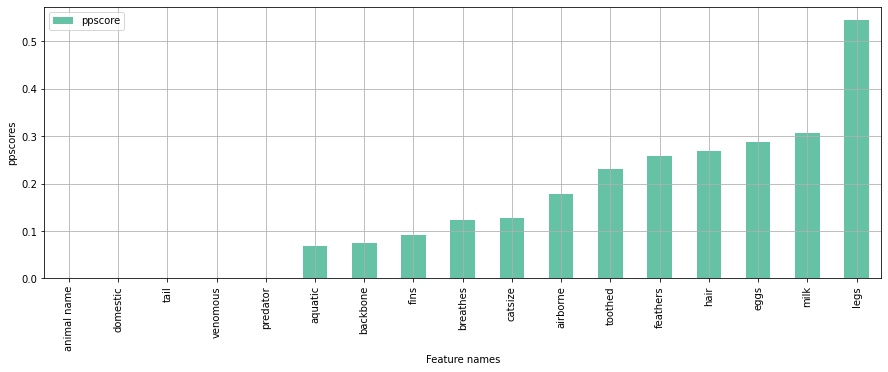

In [18]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
a.plot(x='x',y='ppscore',ax=ax,kind='bar',grid=True,colormap='Set2')
plt.xticks(ticks=[a for a in range(len(a))],labels=a.x)
plt.xlabel('Feature names')
plt.ylabel('ppscores')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


**Features namely, 'Animal name', 'Domestic', 'Tail', 'Venomous', 'Predator' do not have any predictive power in determining the type of the animal** 

                                    ---------------------------------****--------------------------------------

# Model Building
----------------

### CrossValidation

    **Amongst Randomforest and AdaBoost and KNN, Random forst performs the best. however we are asked to build KNN let us build the KNN model (will all the columns and with selected columns)**

In [19]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.feature_selection import SelectKBest,SelectKBest,chi2,f_classif,mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
y= np.array(rawData.type.values)
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [21]:
RDF = RandomForestClassifier()
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
a = cross_val_score(RDF,X,y,cv=kfold)
print(a)
a.mean()

[1.   0.8  0.95 0.9  1.  ]


0.93

In [22]:
ADB = AdaBoostClassifier()
b = cross_val_score(ADB,X,y,cv = kfold)
print(b)
b.mean()

[0.76190476 0.75       0.8        0.65       0.7       ]


0.7323809523809522

In [23]:
knn = KNeighborsClassifier(n_neighbors=2)
c = cross_val_score(knn,X_scaled,y,cv=kfold)
print(c)
c.mean()

[0.95238095 0.8        0.95       0.8        0.95      ]


0.8904761904761905

**Amongst Randomforest and AdaBoost and KNN, Random forst performs the best. however we are asked to build KNN let us build the KNN model (will all the columns and with selected columns)**

                                ---------------------------------****--------------------------------------

# KNN MOEDL
------------

### Grid Search for finding optimum K value

    **Looking at the above table we can clearly there 12 values for k whcich socre the highest accuracy scores, and we have 5 of those K values have the lowest Standerd deviation. So, i have chosen the lowest K value amongs those with highest mean_test_score and lowest std_test_score.**

In [24]:
model = KNeighborsClassifier(weights='distance') ## as class with lowest records has only 4 records, it is ideal to set cv=4 for 4 splits
grid = GridSearchCV(estimator=model,cv = 4, param_grid=dict(n_neighbors = np.array(range(1,41))))
grid.fit(X_scaled,y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [25]:
print(f'The best score by the {grid.best_estimator_} estimator is {grid.best_score_}',end='\n\n')
print(f"The best estimator's selected value for 'k' is as follows:\n{grid.best_params_}")

The best score by the KNeighborsClassifier(n_neighbors=4, weights='distance') estimator is 0.9303846153846154

The best estimator's selected value for 'k' is as follows:
{'n_neighbors': 4}


In [26]:
print(f'The crossValidation estimator parameters are as follows:\n')
grid.get_params()

The crossValidation estimator parameters are as follows:



{'cv': 4,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'distance',
 'estimator': KNeighborsClassifier(weights='distance'),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [27]:
grid.cv_results_

{'mean_fit_time': array([8.47458839e-04, 2.15774775e-03, 3.27169895e-04, 3.74317169e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.93819809e-03,
        3.90601158e-03, 0.00000000e+00, 0.00000000e+00, 2.49028206e-04,
        3.92073393e-03, 5.08129597e-04, 5.17368317e-04, 1.31714344e-03,
        8.18967819e-04, 2.65389681e-03, 1.15871429e-03, 1.94835663e-03,
        4.99904156e-04, 1.89805031e-03, 3.02076340e-03, 9.43362713e-04,
        0.00000000e+00, 2.58624554e-04, 0.00000000e+00, 4.04137373e-03,
        8.38518143e-04, 2.58326530e-04, 0.00000000e+00, 1.37364864e-03,
        3.06463242e-03, 1.44994259e-03, 5.16891479e-04, 5.17308712e-04,
        0.00000000e+00, 0.00000000e+00, 5.08606434e-04, 2.92479992e-04]),
 'std_fit_time': array([9.68911758e-04, 3.73732873e-03, 5.66674881e-04, 6.48336355e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.82115918e-03,
        6.76541051e-03, 0.00000000e+00, 0.00000000e+00, 4.31329505e-04,
        6.79091037e-03, 5.082

In [28]:
cvData = pd.DataFrame(grid.cv_results_)
print('\n****Table of K values and their respective Scores and Ranks****\n')
cvData[['param_n_neighbors','mean_test_score','std_test_score','rank_test_score']].sort_values(by='mean_test_score',ascending=False).head(15)


****Table of K values and their respective Scores and Ranks****



,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
9,10,0.930385,0.052187,1
12,13,0.930385,0.033519,1
15,16,0.930385,0.033519,1
3,4,0.930385,0.052187,1
4,5,0.930385,0.052187,1
5,6,0.930385,0.052187,1
6,7,0.930385,0.052187,1
7,8,0.930385,0.052187,1
8,9,0.930385,0.052187,1
14,15,0.930385,0.033519,1


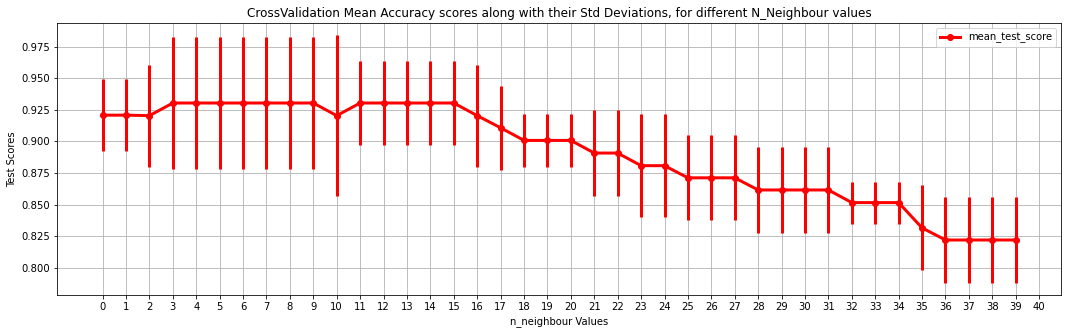

In [29]:
f,ax=plt.subplots(1,1,figsize=(18,5))
cvData.plot(ax=ax, y='mean_test_score', yerr='std_test_score',linewidth=3,marker='o',color='r',xticks=[a for a in range(41)])
plt.title('CrossValidation Mean Accuracy scores along with their Std Deviations, for different N_Neighbour values')
plt.xlabel('n_neighbour Values')
plt.ylabel('Test Scores')
plt.grid(b=True)
plt.show()

**Looking at the above table we can clearly there 12 values for k whcich socre the highest accuracy scores, and we have 5 of those K values have the lowest Standerd deviation. So, i have chosen the lowest K value amongs those with highest mean_test_score and lowest std_test_score. So the selected K value is 11**

                            ******************************++++++++++++++********************************

## KNN MOEDL with all the columns
-------------------------------
**K = 11, 
Weight='Distance'**

In [30]:
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',metric='euclidean')

In [31]:
results = cross_val_score(knn,X_scaled,y,cv=kfold)
print('cross validated results are' ,results)
print('The average scroe is',results.mean())

cross validated results are [0.95238095 0.8        0.9        0.8        1.        ]
The average scroe is 0.8904761904761905


In [32]:
results = knn.fit(X_scaled,y)
results

KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

In [33]:
results.classes_

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [34]:
results.effective_metric_

'euclidean'

In [35]:
results.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')>

In [36]:
results.score(X_scaled,y)

1.0

KNN is performing better on the dataset

## KNN MOEDL with selected features
-------------------------------
**K = 11, 
Weight='Distance'**

In [37]:
knn = KNeighborsClassifier(n_neighbors=11,weights='distance')

In [38]:
results = cross_val_score(knn,X_scaled[:,5:],y,cv=kfold)
print('cross validated results are' ,results)
print('The average scroe is',results.mean())

cross validated results are [0.95238095 0.7        0.95       0.75       0.95      ]
The average scroe is 0.8604761904761904


In [39]:
knn.fit(X_scaled[:,5:],y)
knn.predict(X_scaled[:,5:])

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 1, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [40]:
knn.score(X_scaled[:,5:],y)

0.9900990099009901

In [41]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [42]:
confusion_matrix(knn.predict(X_scaled[:,5:]),y)

array([[41,  0,  1,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

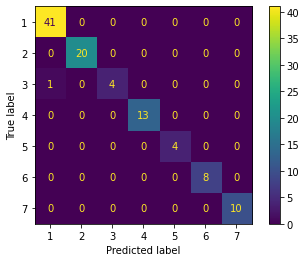

In [43]:
plot_confusion_matrix(knn,X_scaled[:,5:],y)

# Conclusion
------------

**Even though the model with all the columns gives us the better results in Cross validation and accuracy on training data is a perfect score of 1, it is not a best model as it appears that it is memorising the training data and overfitting the values. Hence, in my opinion the model wil selected features even though it has less cross validation score and near perfect accuracy we should select the second model.**